In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

In [8]:
np.random.seed(42)
n_samples, n_features = 50, 100
X = np.random.randn(n_samples, n_features)
idx = np.arange(n_features)
coef = (-1) ** idx * np.exp(-idx / 10)
coef[10:] = 0  # sparsify coef
y = np.dot(X, coef)
y += 0.01 * np.random.normal(size=n_samples)
n_samples = X.shape[0]
X_train, y_train = X[:n_samples // 2], y[:n_samples // 2]
X_test, y_test = X[n_samples // 2:], y[n_samples // 2:]

[ 0.78254557 -0.79687776  0.         -0.17297543  0.39279153 -0.24957933
  0.60407086 -0.          0.15194562 -0.087415   -0.          0.
  0.61638871  0.          0.         -0.          0.10251778  0.
  0.42438157  0.         -0.          0.31126094  0.03642576 -0.
  0.          0.          0.02701953 -0.         -0.          0.
  0.         -0.         -0.          0.20145306 -0.          0.01579268
  0.         -0.28089428  0.05626382  0.          0.          0.
  0.          0.          0.          0.          0.         -0.
  0.          0.         -0.22525581 -0.          0.         -0.
  0.         -0.         -0.          0.27433526 -0.         -0.
 -0.          0.06668276 -0.         -0.          0.          0.19773687
  0.         -0.          0.0055266   0.         -0.          0.
 -0.         -0.          0.          0.         -0.         -0.
 -0.          0.          0.          0.          0.         -0.
  0.          0.         -0.         -0.          0.         -0.
 

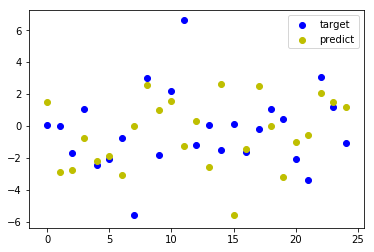

In [30]:
from sklearn.linear_model import Lasso

alpha = 0.01
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
mse = mean_squared_error(y_test, y_pred_lasso)
print(lasso.coef_)
print("r^2 on test data : %f" % r2_score_lasso)
print("mse on test data : %f" % mse)

fig = plt.figure()
plt.scatter(np.arange(n_samples // 2), y_train, c = 'b', label = 'target')
plt.scatter(np.arange(n_samples // 2), y_pred_lasso, c = 'y', label = 'predict')
plt.legend()

[ 0.80654443 -0.72433643  0.08502361 -0.22486296  0.33331068 -0.22851134
  0.61435095 -0.01651123  0.18752709 -0.10662745 -0.          0.
  0.56884615  0.03433065  0.         -0.          0.12389937  0.
  0.35880295  0.         -0.          0.30609583  0.02532408 -0.
  0.          0.          0.03967557 -0.         -0.          0.
  0.         -0.         -0.          0.19874795 -0.00711161  0.02595648
  0.         -0.26243125  0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.
  0.          0.         -0.21266991 -0.         -0.         -0.
  0.04282559 -0.         -0.          0.30809501 -0.         -0.
 -0.          0.07437247 -0.         -0.         -0.          0.21401995
  0.         -0.          0.          0.         -0.          0.
 -0.         -0.          0.          0.         -0.         -0.
 -0.          0.          0.          0.          0.         -0.
  0.          0.         -0.         -0.          0.          0.
 

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Miniconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

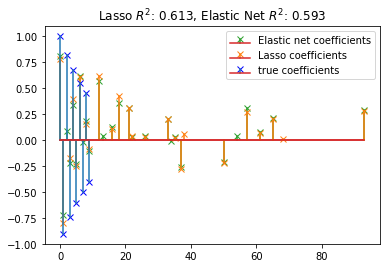

In [29]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
mse_enet = mean_squared_error(y_test, y_pred_enet)
print(enet.coef_)
print("r^2 on test data : %f" % r2_score_enet)
print("mse on test data : %f" % mse_enet)

m, s, _ = plt.stem(np.where(enet.coef_)[0], enet.coef_[enet.coef_ != 0],
                   markerfmt='x', label='Elastic net coefficients')
plt.setp([m, s], color="#2ca02c")
m, s, _ = plt.stem(np.where(lasso.coef_)[0], lasso.coef_[lasso.coef_ != 0],
                   markerfmt='x', label='Lasso coefficients')
plt.setp([m, s], color='#ff7f0e')
plt.stem(np.where(coef)[0], coef[coef != 0], label='true coefficients',
         markerfmt='bx')

plt.legend(loc='best')
plt.title("Lasso $R^2$: %.3f, Elastic Net $R^2$: %.3f"
          % (r2_score_lasso, r2_score_enet))
display(plt)